Dataset Arboles de Decisión – Red Wine Quality:

1)	Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
data = pd.read_csv("C:/Red Wine Quality/winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data.shape

(1599, 12)

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


2)	Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [15]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No existen valores nulos por lo cual no hay necesidad de realizar ninguna mitigación.

3)	Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Características de interés

Calidad: Indica la calidad de 6 clases de vino


In [49]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

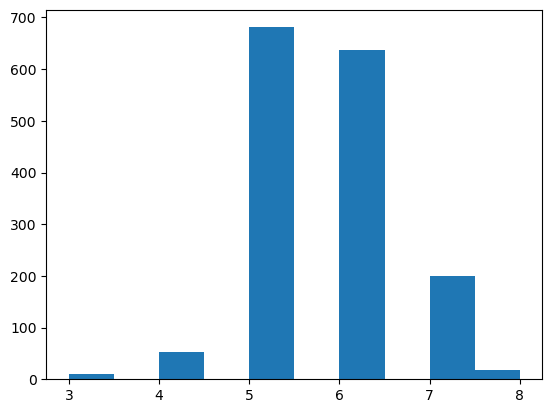

In [34]:
plt.hist(data.quality)

En base al histograma se puede concluir que el dataset posee las características de 6 clases de vino, pero esta no está balanceada.

<Axes: xlabel='alcohol', ylabel='density'>

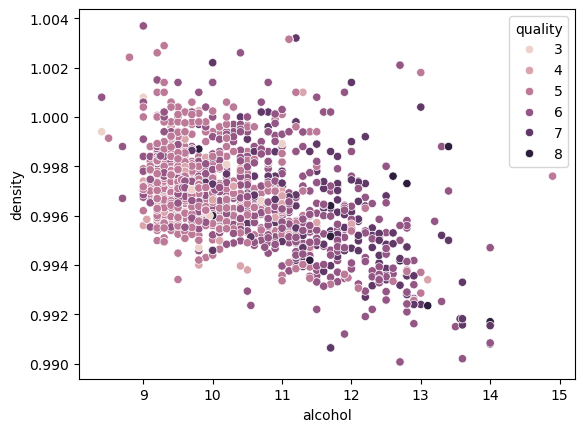

In [96]:
sns.scatterplot(x = "alcohol", y = "density", hue = "quality", data = data)

En base al diagrama de dispersión se puede concluir que entre menor sea la cantidad de alcohol presente en el Vino, mayor será la densidad que este posea,  pero entre mayor sea la cantidad de alcohol mayor será su calidad. 

<Axes: xlabel='volatile acidity', ylabel='alcohol'>

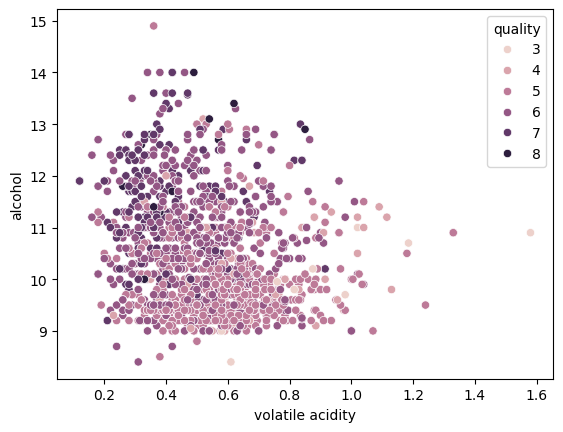

In [101]:
sns.scatterplot(x = "volatile acidity", y = "alcohol", hue = "quality", data = data)

En base al diagrama de dispersión se puede concluir que entre mayor sea la cantidad de alcohol presente en el Vino, mayor será su calidad y su acidez volátil será menor. 

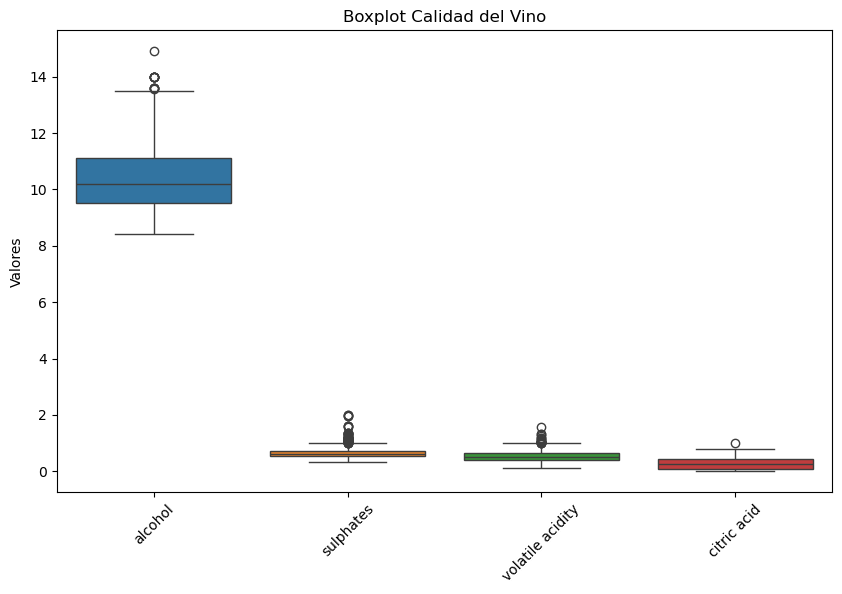

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['alcohol', 'sulphates', 'volatile acidity', 'citric acid']])
plt.xticks(rotation=45)
plt.title('Boxplot Calidad del Vino')
plt.ylabel('Valores')
plt.show()

Después de observar el Boxplot se puede concluir que los altos niveles de alcohol en el Vino presentan niveles bajos de sulfatos, acidez volátil y ácido cítrico, además los sulfatos y la acidez volátil poseen valores atípicos en menor medida.  

In [117]:
predictors_col = ["alcohol", "sulphates", "volatile acidity", "citric acid"]
target_col = ['quality']

In [119]:
predictors = data[predictors_col]
target = data[target_col]

In [121]:
predictors

,alcohol,sulphates,volatile acidity,citric acid
0,9.4,0.56,0.700,0.00
1,9.8,0.68,0.880,0.00
2,9.8,0.65,0.760,0.04
3,9.8,0.58,0.280,0.56
4,9.4,0.56,0.700,0.00
...,...,...,...,...
1594,10.5,0.58,0.600,0.08
1595,11.2,0.76,0.550,0.10
1596,11.0,0.75,0.510,0.13
1597,10.2,0.71,0.645,0.12


In [123]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [125]:
corr = predictors.corr()
corr

,alcohol,sulphates,volatile acidity,citric acid
alcohol,1.000000,0.093595,-0.202288,0.109903
sulphates,0.093595,1.000000,-0.260987,0.312770
volatile acidity,-0.202288,-0.260987,1.000000,-0.552496
citric acid,0.109903,0.312770,-0.552496,1.000000


Al observar la correlación entre las variables numéricas se puede indicar que aquellas que tienen un valor entre 0 y 1 poseen una correlación directa, mientras que por otro lado aquellas que indican un valor cercano a -1 poseen una correlación baja o nula, como es el caso del ácido cítrico con la acidez volátil. 

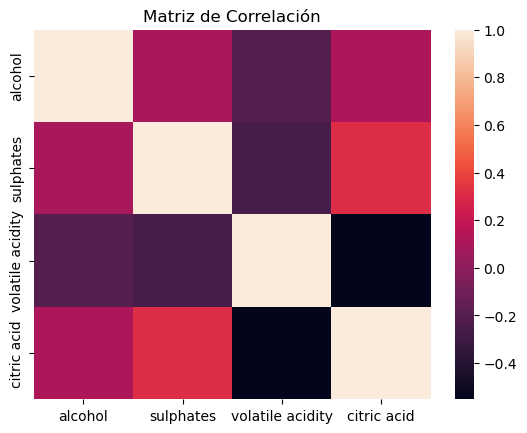

In [128]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

Al observar la matriz de correlación se puede confirmar como el ácido volátil y el ácido cítrico poseen los valores más bajos de correlación, por otro lado el ácido cítrico y los sulfatos poseen los niveles más altos de correlación dentro de la matriz. 

4)	Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [178]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [207]:
print (X_train)

      alcohol  sulphates  volatile acidity  citric acid
112       9.8       0.66             0.600         0.10
889       9.3       0.68             0.900         0.34
1229      9.5       0.64             0.430         0.29
17        9.3       1.28             0.560         0.28
686       9.1       0.60             0.650         0.18
...       ...        ...               ...          ...
742       9.2       0.65             0.615         0.00
1552     11.3       0.66             0.680         0.01
74        9.6       0.82             0.320         0.54
176       9.5       0.47             0.380         0.21
338      11.5       1.00             0.490         0.58

[1279 rows x 4 columns]


In [209]:
print (X_test)

      alcohol  sulphates  volatile acidity  citric acid
912      12.2       0.62             0.460         0.44
1391     11.0       0.58             0.640         0.22
486      10.0       0.47             0.670         0.39
812      10.8       0.71             0.450         0.33
980      10.5       0.71             0.500         0.30
...       ...        ...               ...          ...
1432     11.7       0.85             0.440         0.00
445      10.1       0.56             0.735         0.10
760       9.7       0.57             0.580         0.25
420      11.8       0.73             0.560         0.33
1238      9.6       0.46             0.730         0.00

[320 rows x 4 columns]


5)	Entrenar el modelo configurando los diferentes hiperparámetros. 

In [180]:
tree = DecisionTreeClassifier()

In [182]:
arbol = tree.fit(X_train, y_train)

[Text(0.49409765074047957, 0.9772727272727273, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.15700149858956278, 0.9318181818181818, 'x[1] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.32554957466502116, 0.9545454545454546, 'True  '),
 Text(0.03674188998589563, 0.8863636363636364, 'x[2] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.009026798307475317, 0.8409090909090909, 'x[3] <= 0.375\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.004513399153737658, 0.7954545454545454, 'x[3] <= 0.31\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2, 0, 0, 0]'),
 Text(0.002256699576868829, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.006770098730606488, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.013540197461212976, 0.7954545454545454, 'x[0] <= 9.75\ngini = 0.375\nsamples = 8\nvalue = [0, 0, 2, 6, 0, 0]'),
 T

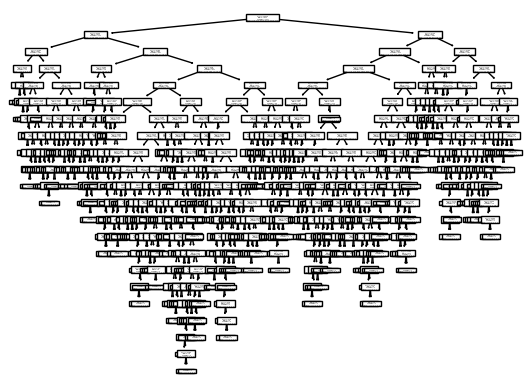

In [184]:
plot_tree(arbol)

Debido a la gran cantidad de informacion y al tamaño del arbol no se puede realizar una lectura de los datos 

In [185]:
predicciones = arbol.predict(X_test)

In [186]:
predicciones

array([8, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 5, 6, 7, 6, 6, 7, 5, 7, 5, 6,
       6, 5, 6, 5, 5, 5, 5, 7, 6, 7, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 4, 6, 5, 6, 6, 5, 4, 6, 5, 7, 6, 5, 7, 6, 5, 5, 6, 5, 6, 7, 7,
       6, 6, 5, 6, 6, 5, 7, 6, 5, 4, 5, 5, 5, 5, 6, 8, 6, 5, 6, 6, 6, 6,
       7, 6, 7, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 7, 5, 5, 7, 6, 5, 6, 5, 7,
       5, 7, 6, 4, 5, 6, 7, 7, 4, 7, 7, 4, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 5, 7, 5, 6, 7, 5, 5, 3, 6, 6, 5, 7, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 6, 4, 6, 5, 7, 6, 6, 4, 6, 7, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 5, 6, 7, 5, 6, 8, 5, 7,
       5, 6, 6, 5, 6, 6, 5, 4, 4, 7, 6, 5, 6, 5, 5, 6, 6, 3, 6, 5, 6, 6,
       6, 6, 5, 6, 7, 5, 5, 6, 6, 5, 5, 5, 7, 6, 4, 7, 5, 7, 5, 7, 6, 5,
       6, 5, 6, 7, 7, 5, 7, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 6, 7, 5, 7, 5,
       6, 7, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6,

In [190]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,3,2,2,1,0
5,2,3,99,32,10,0
6,0,5,30,71,16,2
7,0,1,1,11,21,1
8,0,0,0,6,0,0


Al evaluar la matriz de confusión se puede indagar en como la diagonal indica los valores que el modelo acertó, sin embargo los valores que se encuentran fuera de la diagonal indican desaciertos del modelo o errores en su clasificación, el valor más notorio es el 30 clasificado como vino de clase 6, perteneciendo en realidad a la clase 5.

6)	Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [193]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.60625

Este indica la exactitud que posee el modelo en comparación con los valores reales, este es del 0.60 o del 60%, para la clase “Quality” lo que indica que las clases predichas para los vinos tienen una exactitud media baja. 

In [195]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6199679242886178

Este indica la precisión que posee el modelo, observando los verdaderos positivos sobre el total de los positivos predichos, este es del 0.61 o del 61% indicando una precisión del 61% en la asignación de la calidad de los Vinos.

In [199]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.60625

El Recall indica la sensibilidad de los verdaderos positivos sobre el total de los positivos reales, en este caso es del 0.60 indicando una sensibilidad del 60% o en otras palabras media baja. 

In [201]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6105747008656185

El F1 establece un equilibrio entre la precisión y el Recall indicando que el valor para la clase “Quality” es de 0.61 o del 61%. 

8)	Interpretar, analizar y documentar los resultados obtenidos.

Después de realizar las diferentes actividades se puede concluir:

•	El número total de registros dentro del Dataset es de 1599, dentro de las cuales el alcohol máximo es de 14.9 y el mínimo es de 8.4.

•	No se encontraron datos faltantes, pero si existían datos atípicos dentro de los sulfatos y la acidez volátil

•	Accuracy: este indica la exactitud que posee el modelo en comparación con los valores reales, este es del 0.60 o del 60%, para la clase “Quality” lo que indica que las clases predichas para los vinos tienen una exactitud media baja. 

•	La Precisión: este indica la precisión que posee el modelo, observando los verdaderos positivos sobre el total de los positivos predichos, este es del 0.61 o del 61% indicando una precisión del 61% en la asignación de la calidad de los Vinos.

•	El Recall: indica la sensibilidad de los verdaderos positivos sobre el total de los positivos reales, en este caso es del 0.60 indicando una sensibilidad del 60% o en otras palabras media baja. 

•	El F1 Score: establece un equilibrio entre la precisión y el Recall indicando que el valor para la clase “Quality” es de 0.61 o del 61%. 

•	En base al histograma se puede concluir que el dataset posee las características de 6 clases de vino, pero esta no está balanceada.

•	En base al diagrama de dispersión se puede concluir que entre menor sea la cantidad de alcohol presente en el Vino, mayor será la densidad que este posea,  pero entre mayor sea la cantidad de alcohol mayor será su calidad. 

•	En base al diagrama de dispersión se puede concluir que entre mayor sea la cantidad de alcohol presente en el Vino, mayor será su calidad y su acidez volátil será menor. 

•	Después de observar el Boxplot se puede concluir que los altos niveles de alcohol en el Vino presentan niveles bajos de sulfatos, acidez volátil y ácido cítrico, además los sulfatos y la acidez volátil poseen valores atípicos en menor medida. 

•	Al observar la correlación entre las variables numéricas se puede indicar que aquellas que tienen un valor entre 0 y 1 poseen una correlación directa, mientras que por otro lado aquellas que indican un valor cercano a -1 poseen una correlación baja o nula, como es el caso del ácido cítrico con la acidez volátil. 

•	Al observar la matriz de correlación se puede confirmar como el ácido volátil y el ácido cítrico poseen los valores más bajos de correlación, por otro lado, el ácido cítrico y los sulfatos poseen los niveles más altos de correlación dentro de la matriz.

•	Al evaluar la matriz de confusión se puede indagar en como la diagonal indica los valores que el modelo acertó, sin embargo los valores que se encuentran fuera de la diagonal indican desaciertos del modelo o errores en su clasificación, el valor más notorio es el 30 clasificado como vino de clase 6, perteneciendo en realidad a la clase 5.
